# K-Means


The pinguins are back! Use K-Means to find groups from the penguins dataset. Do they correspond to the true labels?

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
%pip install palmerpenguins

In [4]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
sns.set_style('whitegrid')

In [5]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
penguins = penguins.dropna()

In [7]:
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
X_df = pd.DataFrame(X, columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])


### KMeans from Scratch

In [11]:
#TODO train a k-means model. What k are you looking for?

def kmeans(X, k, max_iters=100, tol=0.0001):
    # Random intizialization of centroids
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for i in range(max_iters):
        # Assignation each point to the closest centroid
        distances = np.zeros((len(X), k)) #Distance matrix
        
        #Distance between centroids and each data point
        for j, centroid in enumerate(centroids):
            distances[:, j] = np.linalg.norm(X - centroid, axis=1)
        
        #Assignation of each data point to the closest centroid 
        clusters = np.argmin(distances, axis=1)
        
        # Update of centroids
        newCentroids = np.zeros((k, X.shape[1]))
        
        #Mean of assigned data points of each cluster to get updated centroid coordinates
        for j in range(k):
            newCentroids[j] = np.mean(X[clusters == j], axis=0)
        
        # Check if the centroids have moved significantly
        if np.linalg.norm(newCentroids - centroids) < tol:
            break
            
        centroids = newCentroids
    
    #Loss computed as the sum of distances between points and its assigned cluster.
    loss = np.sum([np.linalg.norm(X[clusters == j] - centroids[j], axis=1).sum() for j in range(k)])
      
    return loss, clusters, centroids


In [12]:
loss, clusters, centroids = kmeans(X, k=3)
X_df['cluster'] = clusters


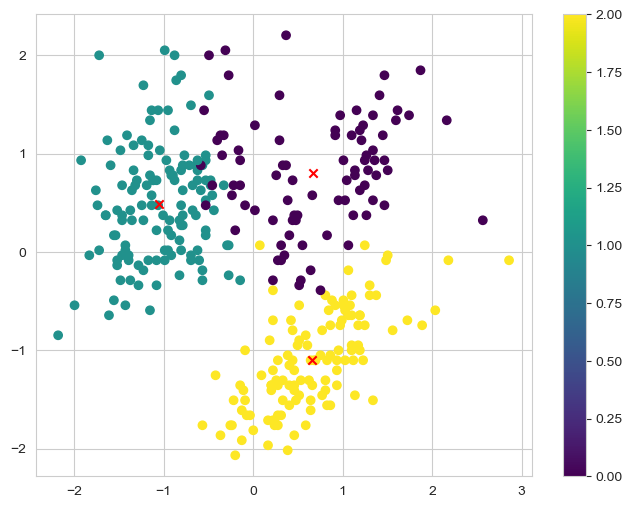

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.colorbar(scatter)
plt.show()

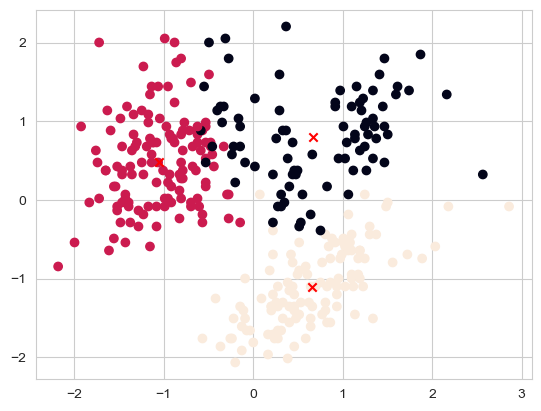

In [14]:
#Make a plot where the color is the label assigned by the clustering
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()

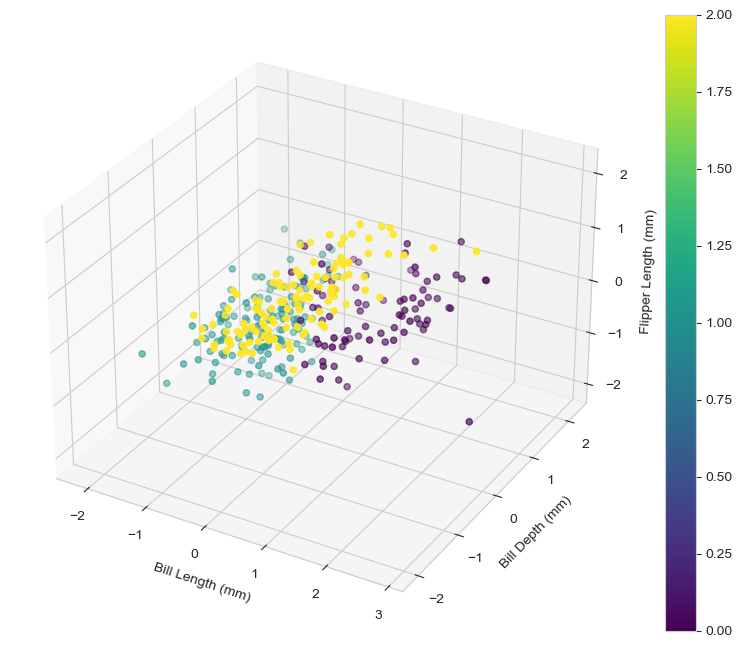

In [15]:
#Make a 3D plot where the color is the label assigned by the clustering
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:,0], X[:,1], X[:,2], c=clusters, cmap='viridis')
plt.colorbar(scatter)

ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')

plt.show()


In [16]:
#Labels
X_df['cluster']

0      1
1      1
2      1
3      1
4      1
      ..
328    0
329    0
330    0
331    0
332    0
Name: cluster, Length: 333, dtype: int64

### KMeans from Sklearn

In [17]:
#Kmeans from sklearn
from sklearn.cluster import KMeans
kMeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Add cluster labels to X
X_df = pd.DataFrame(X, columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])
X_df['cluster'] = kMeans.labels_

c:\Users\Miguel Granados C\anaconda3\envs\equinox_base\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


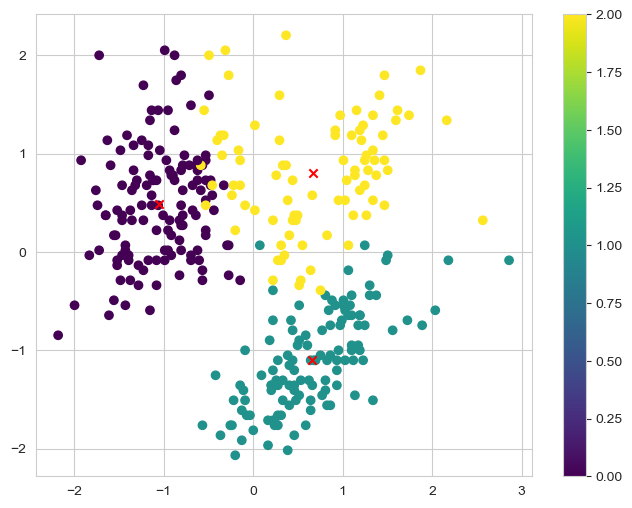

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(X[:,0], X[:,1], c=kMeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.colorbar(scatter)
plt.show()

In [19]:
#TODO To which label each class correspond? Search about scipy linear_sum_assignment
#It is an optimization problem.
#Show the table

from scipy.optimize import linear_sum_assignment



# Compute pairwise distances between observations
distances = kMeans.transform(X) #Returns norm distance to each cluster center

# Convert distance matrix to cost matrix
cost_matrix = -distances

# Use linear sum assignment to find optimal assignment of observations to clusters
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Assign cluster labels based on optimal assignment
labels = col_ind[np.argsort(row_ind)]

# Print cluster labels for first 10 observations
print(labels[:10])

[1 0 2]


### Elbow Method

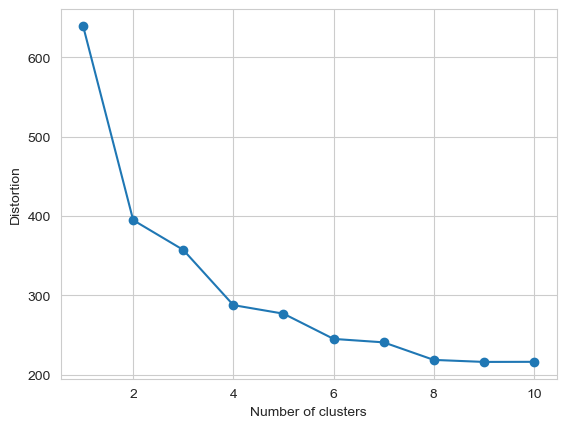

In [20]:
#TODO Do the elbow method for different k's

# Compute score for different k's
scores = []
for k in range(1, 11):
    loss, clusters, centroids = kmeans(X, k)
    score = np.sum([np.linalg.norm(X[clusters == j] - centroids[j], axis=1).sum() for j in range(k)])
    scores.append(score)

# Plot elbow curve
plt.plot(range(1, 11), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Model training (random)

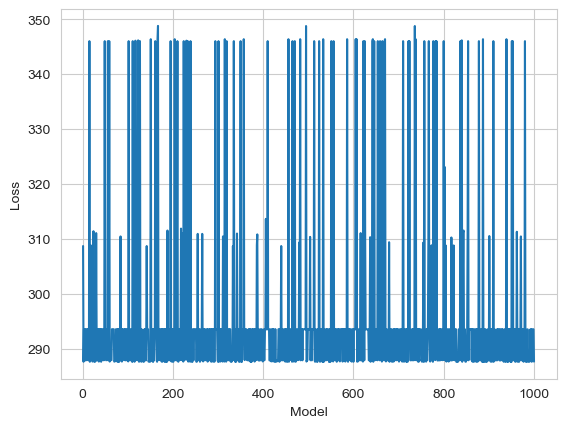

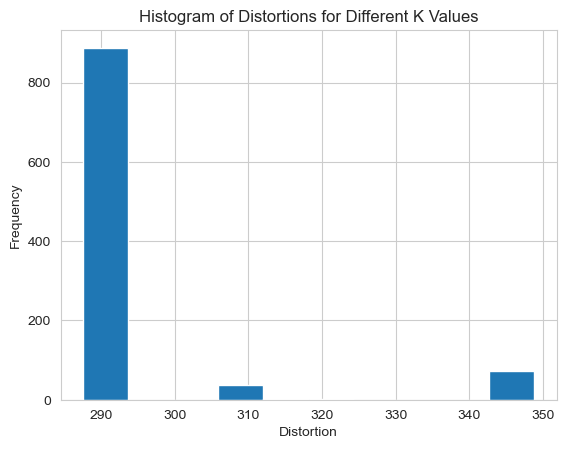

In [39]:
#TODO train 1000 models, with random initialization. Plot the results of the losses

losses = []
for i in range(1000):
    loss, labels, centroids = kmeans(X, 4)
    losses.append(loss)

# Plot losses
plt.plot(range(1, 1001), losses)
plt.xlabel('Model')
plt.ylabel('Loss')
plt.show()

plt.hist(losses, bins=10)
plt.title("Histogram of Distortions for Different K Values")
plt.xlabel("Distortion")
plt.ylabel("Frequency")
plt.show()


### Model training (kmeans++)

In [22]:
#TODO train 1000 models, with a better initialization. Plot the results of the losses

def kmeansPlus(X, k, max_iters=100, tol=0.0001):
    # Random intizialization of centroids
    centroids = init_centroids(X, k)
    
    for i in range(max_iters):
        # Assignation each point to the closest centroid
        distances = np.zeros((len(X), k)) #Distance matrix
        
        for j, centroid in enumerate(centroids):
            distances[:, j] = np.linalg.norm(X - centroid, axis=1)
            
        clusters = np.argmin(distances, axis=1)
        
        # Update of centroids
        newCentroids = np.zeros((k, X.shape[1]))
        for j in range(k):
            newCentroids[j] = np.mean(X[clusters == j], axis=0)
        
        # Check if the centroids have moved significantly
        if np.linalg.norm(newCentroids - centroids) < tol:
            break
            
        centroids = newCentroids
    
    #Loss computed as the sum of distances between points and its assigned cluster.
    loss = np.sum([np.linalg.norm(X[clusters == j] - centroids[j], axis=1).sum() for j in range(k)])
      
    return loss, clusters, centroids


def init_centroids(X, k):
    
    # First centroid (random)
    
    centroids = [X[np.random.choice(len(X))]]
    
    # Choose remaining centroids using k-means++ initialization (probability proportional to the squared distance to the closest existing centroid)
    for _ in range(k - 1):
        #distance of all points to closest centroid of current centroids
        dists = np.array([np.min([np.linalg.norm(x - c) for c in centroids]) for x in X])
        #distances normalized
        probs = dists / dists.sum()
        
        #cumulative sum of probabilities
        cumprobs = probs.cumsum()
        
        #Choosing of new centroid.
        r = np.random.rand()
        for j, p in enumerate(cumprobs):
            if r < p:
                i = j
                break
        centroids.append(X[i])
    
    return np.array(centroids)

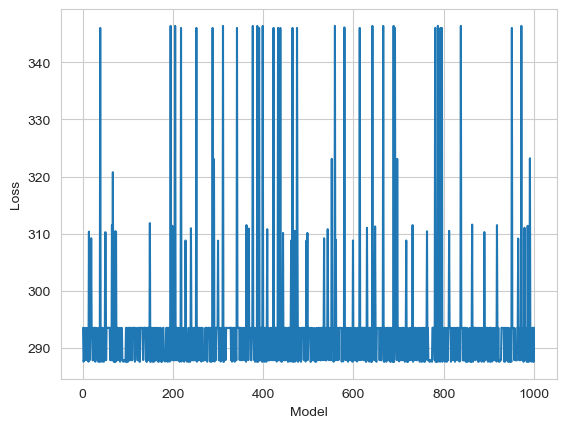

In [27]:
losses = []
for i in range(1000):
    loss, labels, centroids = kmeansPlus(X, 4)
    losses.append(loss)

# Plot losses
plt.plot(range(1, 1001), losses)
plt.xlabel('Model')
plt.ylabel('Loss')
plt.show()

# Image Segmentation

In [28]:
#Import libraries
from skimage import io
from skimage import color

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline
import requests

In [29]:
#Download image. Feel free to change the image. Remember that we are working with RGB images.
url = "https://www.rainforest-alliance.org/wp-content/uploads/2021/06/poison-dart-frog-thumb-1-400x400.jpg"
img_data = requests.get(url).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)
    
img = io.imread("image.jpg")


(-0.5, 399.5, 399.5, -0.5)

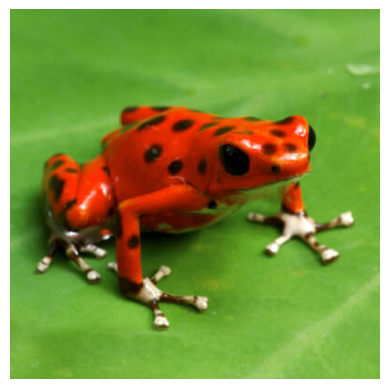

In [30]:
#Show image
plt.imshow(img)
plt.axis("off")

In [31]:
#Check the shape of the image. If there are more or less channels, we might have an image in another format
print(img.shape)
w, h, d = tuple(img.shape)
# Image to 2d array
pixels = np.reshape(img, (w*h, d))
pixels.shape

(400, 400, 3)


(160000, 3)

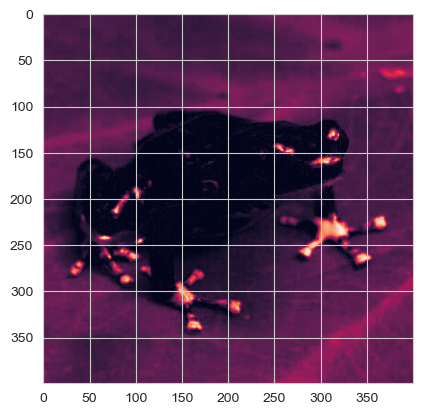

In [32]:
#Show just the blue channel
plt.imshow(img[:,:,2])

In [41]:
def kmeans(X, k, max_iters=100, tol=0.0001):
    # Random intizialization of centroids
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for i in range(max_iters):
        # Assignation each point to the closest centroid
        distances = np.zeros((len(X), k)) #Distance matrix
        
        #Distance between centroids and each data point
        for j, centroid in enumerate(centroids):
            distances[:, j] = np.linalg.norm(X - centroid, axis=1)
        
        #Assignation of each data point to the closest centroid 
        clusters = np.argmin(distances, axis=1)
        
        # Update of centroids
        newCentroids = np.zeros((k, X.shape[1]))
        
        #Mean of assigned data points of each cluster to get updated centroid coordinates
        for j in range(k):
            newCentroids[j] = np.mean(X[clusters == j], axis=0)
        
        # Check if the centroids have moved significantly
        if np.linalg.norm(newCentroids - centroids) < tol:
            break
            
        centroids = newCentroids
    
    #Loss computed as the sum of distances between points and its assigned cluster.
    loss = np.sum([np.linalg.norm(X[clusters == j] - centroids[j], axis=1).sum() for j in range(k)])
      
    return loss, clusters, centroids

In [66]:
loss, clusters, centroids = kmeans(pixels, 5)

#Assignation of pixels to cluster of nearest centroid
segImage = np.reshape(clusters, (w, h))
#THE MISTAKE WAS HERE. With this assignation each pixel is assigned to a cluster label only instead of an RGB value.


In [67]:
'''With this correction creates an array of zeros with the same shape as the pixels array, and then assigns the RGB values of the centroids 
to the corresponding pixels based on their cluster label. 
'''
segImage = np.zeros_like(pixels)
segImage[:, 0] = centroids[clusters, 0]
segImage[:, 1] = centroids[clusters, 1]
segImage[:, 2] = centroids[clusters, 2]
segImage = np.reshape(segImage, (w, h, d))

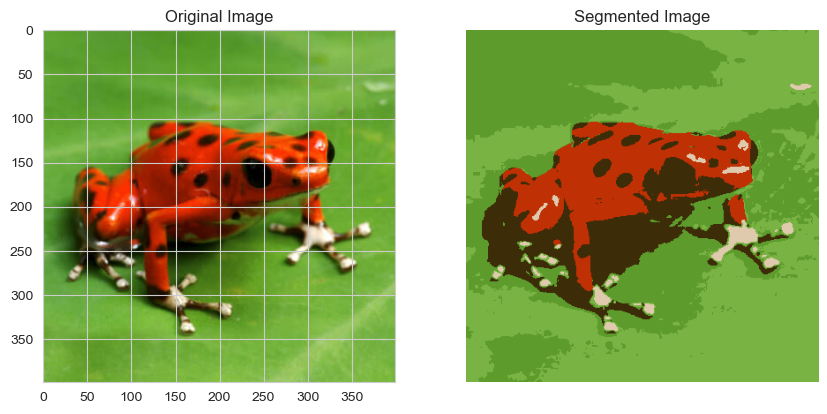

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.axis("off")
ax[0].imshow(img)
ax[1].imshow(segImage)
ax[0].set_title('Original Image')
ax[1].set_title('Segmented Image')
plt.show()

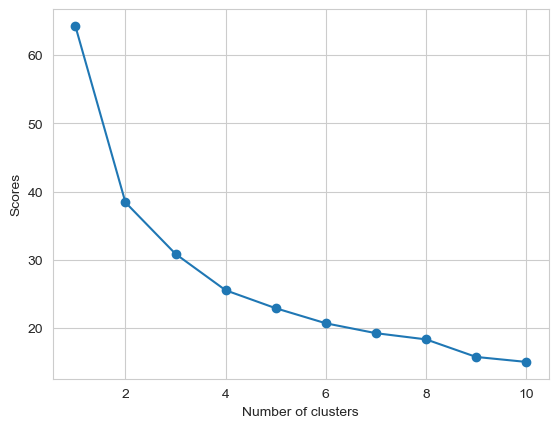

In [72]:
# Compute score for different k's and stores segmented images for different k's
scores = []
images=[]

for k in range(1, 11):
    loss, clusters, centroids = kmeans(pixels, k)
    
    #Assignation of pixels to cluster of nearest centroid
    
    segImage = np.zeros_like(pixels) #Initializes an array of zeros with the same shape as the original image
    segImage[:, 0] = centroids[clusters, 0] #sets the values of the red channel of the segmented image to the red values of the centroids 
    segImage[:, 1] = centroids[clusters, 1] # green channel
    segImage[:, 2] = centroids[clusters, 2] # blue
    segImage = np.reshape(segImage, (w, h, d))
    
    #Elbow score
    score = loss / (w*h) #loss by total of pixels
    scores.append(score)
    
    images.append(segImage)
    


#Plot elbow curve
plt.plot(range(1, 11), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.show()

In [73]:
#Method for showing the comparison of the images
def print_images(imagenes):
    #Configuration of the plot
    plt.figure(figsize=(15, 10))
    plt.subplot(int(np.ceil(len(imagenes)/3)), 3, 1)

    #Show original image
    plt.imshow(img)
    plt.title("Imagen Original")
    plt.axis("off")

    #Show the segmented images
    for idx in range(len(imagenes)):
        plt.subplot(int(np.ceil(len(imagenes)/3)), 3, 2 + idx)
        plt.imshow(imagenes[idx].astype('uint8'))
        plt.title(f"{idx+1} Colors")
        plt.axis("off")
    plt.show()

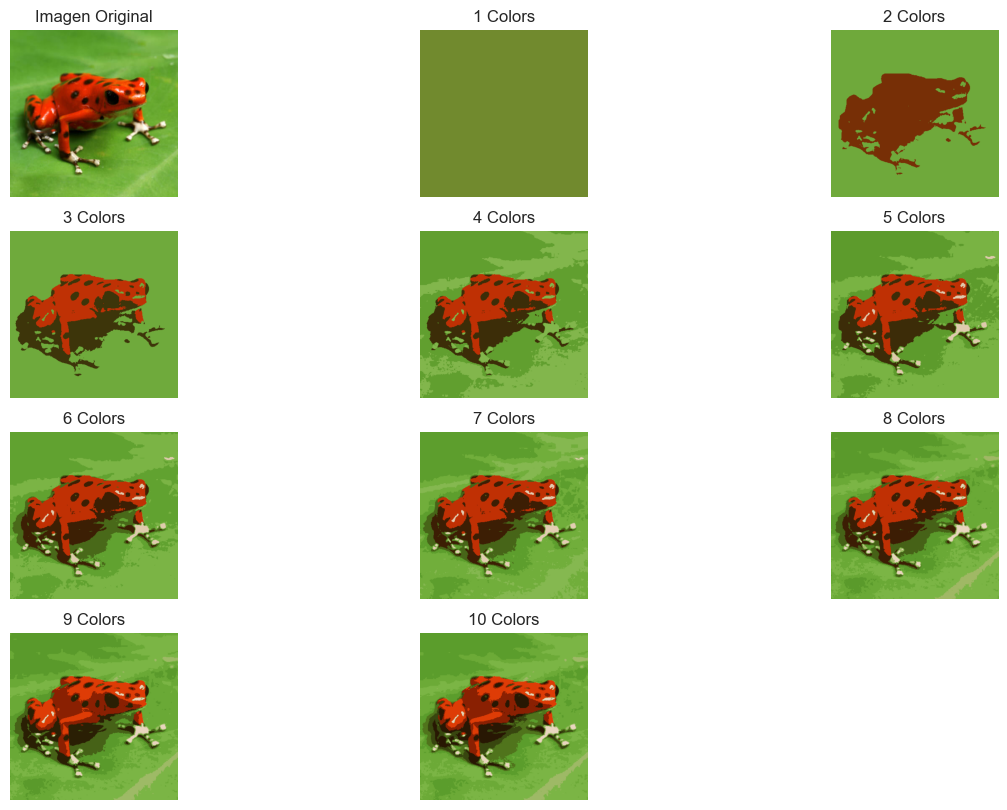

In [74]:
print_images(images)